This notebook will take you through Lesson 3 in Introductory Earth Data Science: https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/

## Import Shapefile Data Into Python Using Geopandas
You will use the geopandas library to work with vector data in Python. Geopandas is built on top of the Python Pandas library. It stores spatial data in a tabular, dataframe format.


In [18]:
# Import packages
import os
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

To begin, set your working directory to earth-analytics and then download a single shapefile. 

You will start with working with the Natural Earth country boundary lines layer: https://www.naturalearthdata.com/downloads/

Note that below you are using EarthPy to download a dataset from naturalearthdata.com (via Amazon Web Services). 

EarthPy automatically creates the earth-analytics directory for you when you use it, but by default makes this directory in your home directory. We're doing this here because you guys are on PCs.

You set the working directory after you download the data as a precaution to ensure that the earth-analytics directory already exists on your computer. This is not a standard order of operations, as we are not using our SU H drive, but we are demonstrating it here to ensure the notebook runs on all computers!

In [2]:
# Download a political boundaries shapefile and set your working directory
et.data.get_data(
    url='https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip')

# Set working directory - earthpy creates earth-analytics for you in your home dir
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

### geopandas
Next, you open the data using geopandas. 

***geopandas*** takes all of the data science magic from the pandas library and makes it compatible with shapfiles.

Learn more here: https://geopandas.org/

You can view the first 5 rows of the data using .head() in the same way you used .head() for Pandas dataframes.¶

In [3]:
os.getcwd()

'C:\\Users\\ekcarter\\earth-analytics'

We're going to download a second dataset, called coastlines:

In [4]:
#set URL for the dataset
coastlines_url = "https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip"

#download the URL into your earth-analytics folder
et.data.get_data(url=coastlines_url)

#name the filepath relative to your working directory: note this is operating system agnostic
coastlines_path = os.path.join("data", "earthpy-downloads",
                               "ne_50m_coastline",
                               "ne_50m_coastline.shp")

#use geopandas as gpd to "read_file"
coastlines = gpd.read_file(coastlines_path)

#prints "head" just like pandas!
coastlines.head()

,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180.00000 -16.15293, 179.84814 -16..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.05420, 177.28740 -17..."
2,0,Coastline,4.0,"LINESTRING (127.37266 0.79131, 127.35381 0.847..."
3,0,Coastline,3.0,"LINESTRING (-81.32231 24.68506, -81.42007 24.7..."
4,0,Coastline,4.0,"LINESTRING (-80.79941 24.84629, -80.83887 24.8..."


### See? GeoPandas Creates GeoDataFrames Which Have the Same Structure As Pandas DataFrames
The structure of a Geopandas GeoDataFrame is very similar to a Pandas dataframe.

### A few differences include:
The GeoDataFrame contains a geometry column which stores spatial information. The geometry column in your GeoDataFrame stores the boundary information (the lines that make up each shape in your data). This allows you to plot points, lines or polygons.

The GeoDataFrame stores spatial attributes such as coordinate reference systems and spatial extents.

Similar to Pandas, you can plot the data using .plot()

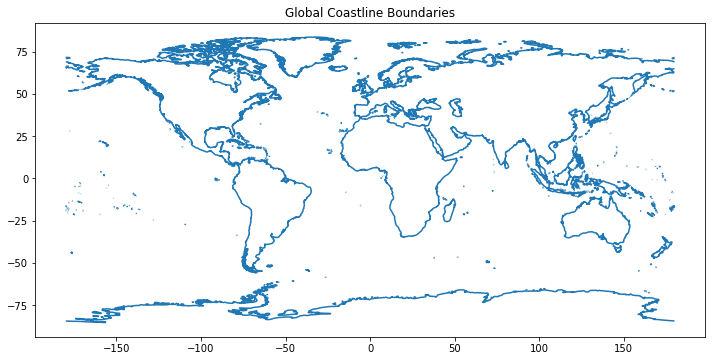

In [5]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Global Coastline Boundaries")
plt.show()

### Check the Spatial Vector Data Type
You can look at the data to figure out what type of data are stored in the shapefile (points, line or polygons). However, you can also get that information by calling .geom_type

In [6]:
# Is the geometry type point, line or polygon?
coastlines.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
1423    LineString
1424    LineString
1425    LineString
1426    LineString
1427    LineString
Length: 1428, dtype: object

Also similar to Pandas, you can view descriptive information about the GeoDataFrame using .info(). This includes the number of columns, rows and the header name and type of each column.¶

In [7]:
coastlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   1428 non-null   int64   
 1   featurecla  1428 non-null   object  
 2   min_zoom    1428 non-null   float64 
 3   geometry    1428 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 44.8+ KB


### Open Vector Point Data
Next, you will open up another shapefile using Geopandas.

In [8]:
# Open a second layer
et.data.get_data(
    url='https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_populated_places_simple.zip')

# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

#read in a new geopandas data frame called "cities"
cities = gpd.read_file(populated_places_path)

### TASK 1: Is Cities a point, line, or polygon file? Type a command to find out and interpret the answer.

In [9]:
# Task 1 answer here
cities.geom_type

#This is a point file! each spatial object is defined by a single latitude, longitude pair

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1244    Point
1245    Point
1246    Point
1247    Point
1248    Point
Length: 1249, dtype: object

The attributes for a shapefile imported into a GeoDataFrame can be viewed in the GeoDataFrame itself.

In [11]:
# View first 5 rows of GeoDataFrame
cities.head(10)


# Experiment! How would you view the first 10 rows of a GeoDataFrame?

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,0,Bombo,0.0,...,8,7,0.0,None,None,0,0,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,0,Fort Portal,0.0,...,7,7,233476.0,None,None,0,0,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,0,Potenza,0.0,...,8,8,3170027.0,None,None,0,0,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,0,Campobasso,0.0,...,8,8,3180991.0,None,None,0,0,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,0,Aosta,0.0,...,7,7,3182997.0,None,None,0,0,7.0,1159117361,POINT (7.31500 45.73700)
5,10,1,8,Admin-0 region capital,Mariehamn,None,None,0,Mariehamn,0.0,...,6,6,3041732.0,None,None,0,0,7.0,1159119239,POINT (19.94900 60.09700)
6,10,1,0,Admin-0 region capital,Ramallah,None,None,0,Ramallah,0.0,...,7,7,282239.0,None,None,0,0,9.0,1159121947,POINT (35.20621 31.90294)
7,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,2,2,6691831.0,None,Vatican City,1,0,7.0,1159127243,POINT (12.45339 41.90328)
8,8,10,3,Admin-1 region capital,Poitier,None,Poitiers,0,Poitier,0.0,...,8,8,2986495.0,None,Poitier,1,0,6.7,1159130485,POINT (0.33328 46.58329)
9,8,10,3,Admin-1 region capital,Clermont-Ferrand,None,None,0,Clermont-Ferrand,0.0,...,10,9,3024635.0,None,Clermont-Ferrand,1,0,6.0,1159130517,POINT (3.08001 45.77998)


Just like with Pandas DataFrames, standard arguments can be used to calculate summary statistics on your GeoPandas object:

In [12]:
#Let's see what our most populous city is
print(cities.pop_max)

print("The largest city has " + 
      str(cities.pop_max.max()) 
      + " people!")

0          75000
1          42670
2          69060
3          50762
4          34062
          ...   
1244    11748000
1245    18845000
1246     4630000
1247     5183700
1248     7206000
Name: pop_max, Length: 1249, dtype: int64
The largest city has 35676000 people!


### Creating Maps Using Multiple Shapefiles
You can create maps using multiple shapefiles with Geopandas in a similar way that you may do so using a graphical user interface (GUI) tool like ArcGIS or QGIS (open source alternative to ArcGIS). To do this you will need to open a second spatial file. Below you will use the Natural Earth populated places shapefile to add additional layers to your map.

To plot two datasets together, you will first create a Matplotlib figure object. Notice in the example below that you define the figure ax1 in the first line. You then tell GeoPandas to plot the data on that particular figure using the parameter ax=

The code looks like this:

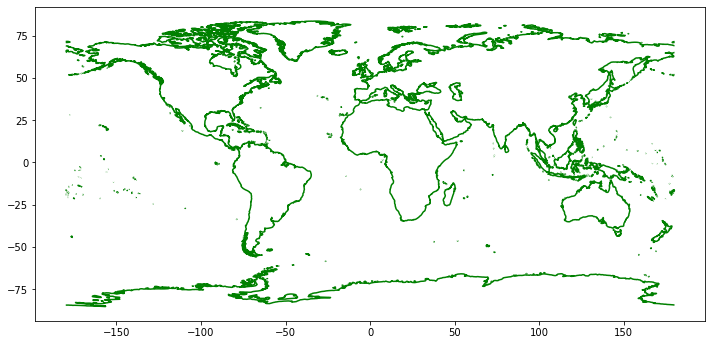

In [14]:
#Experiment! 
#What happens if you change FigSize numbers? 
#What happens if you "comment out" (put a # in front of) plt.show()? 
#What happens if you change the color?

f, ax1 = plt.subplots(figsize=(12, 8))
coastlines.plot(ax=ax1,
               color = "green")
plt.show()

To add another layer to your map, you can add a second .plot() call and specify the ax= to be ax1 again. This tells Python to layer the two datasets in the same figure.

In [ ]:
# Create a map or plot with two data layers

#Experiment! What happens if you remove ax=ax1 from coastlines.plot() and cities.plot()?

f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1,
                color="black")
cities.plot(ax=ax1)

# Add a title
ax1.set(title="Map of Cities and Global Lines")
plt.show()

Learn more about custom plotting in Python:

https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/

https://geopandas.org/gallery/plotting_with_geoplot.html

### TASK 2
Using the resources above, create a map that contains:
1. Coastal lines (black)
2. Cities (points), with a color scale for pop_max
3. A legend

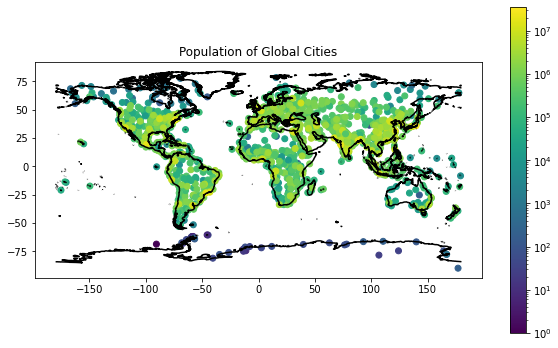

In [24]:
# Format and plot your results from task 2
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1,
                color="black"
               )
cities.plot(ax=ax1,
            column=cities.pop_max,
            norm=matplotlib.colors.LogNorm(vmin=cities.pop_max.min()+1, vmax=cities.pop_max.max()),
            legend = True
           )
           

# Add a title
ax1.set(title="Population of Global Cities")
plt.show()


In [22]:
cities.pop_max.max()

35676000

### Geoprocessing Vector Data Geoprocessing in Python: Clip Data
Sometimes you have spatial data for a larger area than you need to process. For example you may be working on a project for your state or country. But perhaps you have data for the entire globe.

You can clip the data spatially to another boundary to make it smaller. Once the data are clipped, your processing operations will be faster. It will also make creating maps of your study area easier and cleaner.

In this workflow, you'll subset your cities data to only look at counties in the United States. First, we'll import a dataset of global political boundaries.

In [25]:
country_data_url = "https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip"
et.data.get_data(url=country_data_url)

# Create a path to the countries shapefile
countries_path = os.path.join("data", "earthpy-downloads",
                              "ne_50m_admin_0_countries", 
                              "ne_50m_admin_0_countries.shp")

# Read in the countries shapefile as GeoPandas dataframe
countries = gpd.read_file(countries_path)

# View attribute table:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FC_TR,FC_ID,FC_PL,FC_GR,FC_IT,FC_NL,FC_SE,FC_BD,FC_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


### Next, we'll use built-in pandas funcitonality to subset the shapefile to just the US boundary

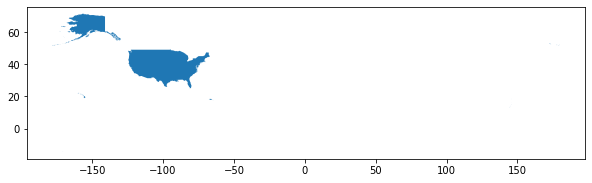

In [26]:
# Subset the countries data to just a single country
united_states_boundary = countries.loc[countries['SOVEREIGNT']
                                       == 'United States of America']

# Notice in the plot below, that only the boundary for the USA is in the new variable
f, ax = plt.subplots(figsize=(10, 6))
united_states_boundary.plot(ax=ax)
plt.show()

### Now, we'll subset the cities layer to include only records which overlap in space with the united_states_boundary layer (aka are in the United States)

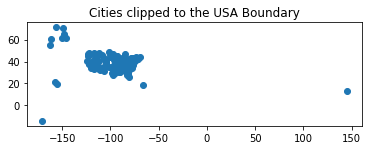

In [27]:
# Clip the cities data to the USA boundary
# Note -- this operation may take some time to run - be patient
cities_in_usa = gpd.clip(cities, united_states_boundary)

# Plot your final clipped data
f, ax = plt.subplots()
cities_in_usa.plot(ax=ax)
ax.set(title="Cities clipped to the USA Boundary")
plt.show()

### TASK 3: What is the largest city in the United States? What is the population of that city?
*Hint: check the colutions to the extra credit from Python101

In [31]:
#Task 3 code here
print("The largest city in the US is "+ 
      str(cities_in_usa.name[cities_in_usa['pop_max'].idxmax()])+ 
      " with a population of " +
     str(cities_in_usa.pop_max[cities_in_usa['pop_max'].idxmax()])+ 
     " people... \n but that's only because we accidentally cropped NYC (#NYStrong)")

The largest city in the US is Los Angeles with a population of 12500000 people... 
 but that's only because we accidentally cropped NYC (#NYStrong)
